# Parse log file to obtain trading data

In [63]:
import pandas as pd
from matplotlib import pyplot as plt

In [64]:
log_file = 'log/round2_empty.log'

with open(log_file, 'r') as f:
    lines = f.readlines()
    
    activity_start = 0
    while not lines[activity_start].startswith('Activities log:'):
        activity_start += 1
    activity_start += 1
    activity_end = activity_start + 1
    while lines[activity_end] != '\n':
        activity_end += 1

    trade_start = activity_end + 1
    while not lines[trade_start].startswith('Trade History:'):
        trade_start += 1
    trade_start += 1
    trade_end = len(lines)

    trade_history = ''.join(lines[trade_start:trade_end])

activity_start, activity_end, trade_start, trade_end

(5005, 8006, 8011, 12630)

In [65]:
activity_log = pd.read_csv(log_file, skiprows=activity_start, nrows=activity_end-activity_start-1, sep=';')
trade_history = pd.read_json(trade_history)
market_trades = trade_history[(trade_history.buyer == '') & (trade_history.seller == '')]
own_trades = trade_history[(trade_history.buyer == 'SUBMISSION') | (trade_history.seller == 'SUBMISSION')]

C:\Users\Meilism\AppData\Local\Temp\ipykernel_25700\972667722.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  trade_history = pd.read_json(trade_history)


# Visualize market trades and own trades

In [66]:
products = market_trades.symbol.unique()
products

array(['AMETHYSTS', 'STARFRUIT', 'ORCHIDS'], dtype=object)

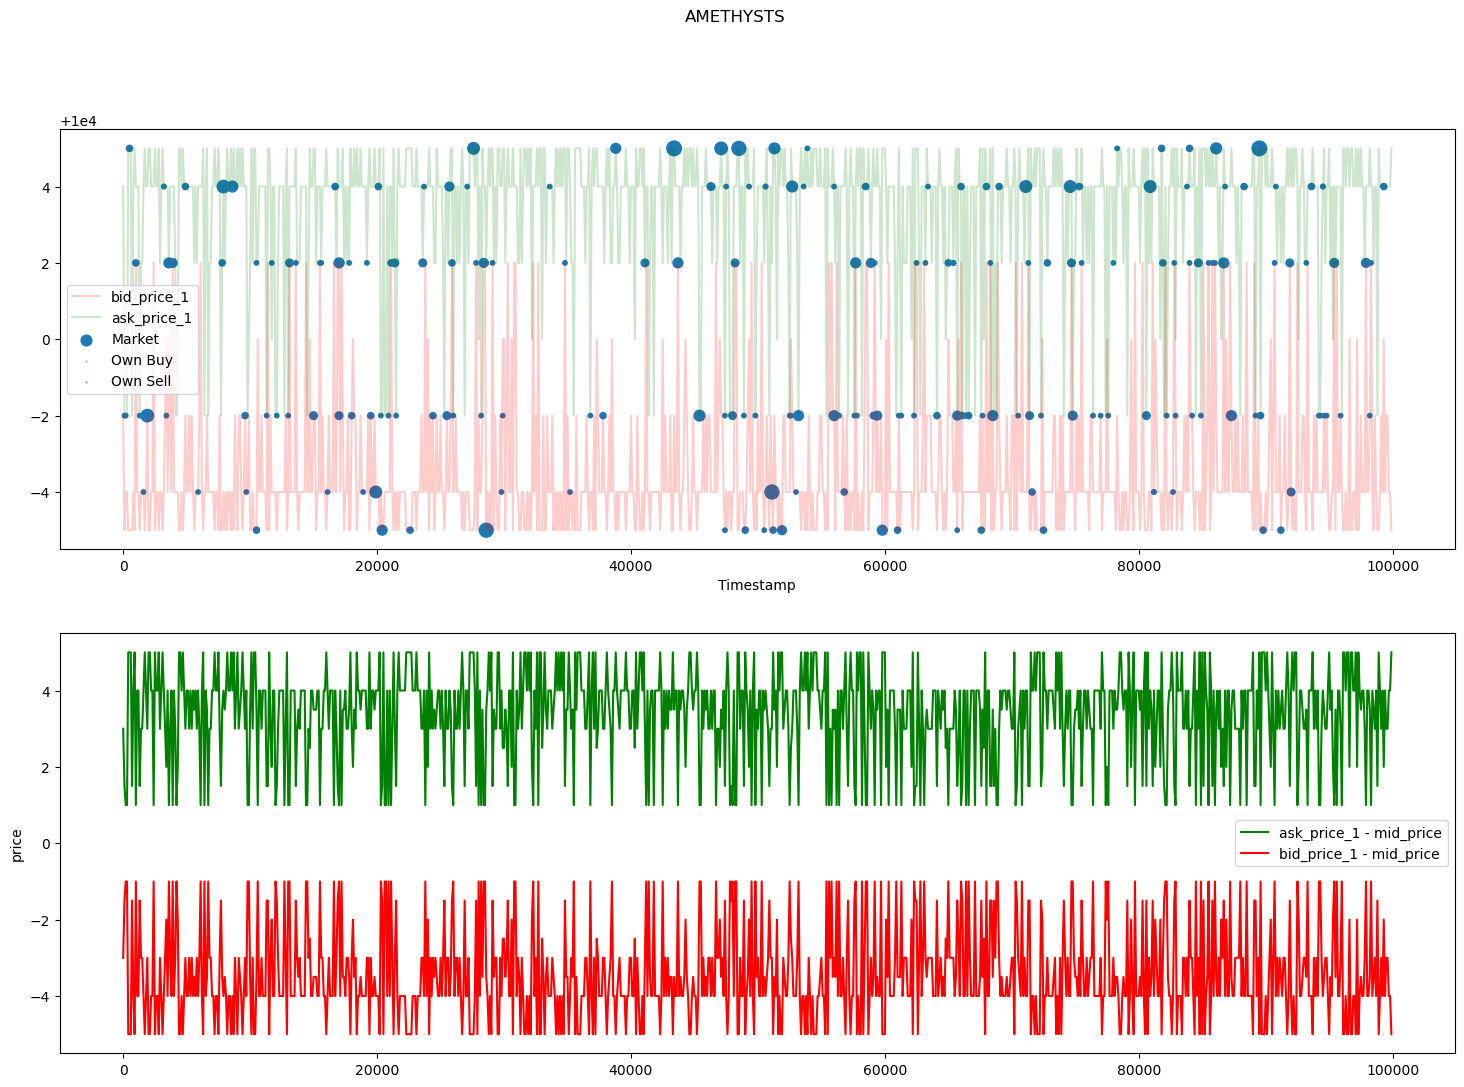

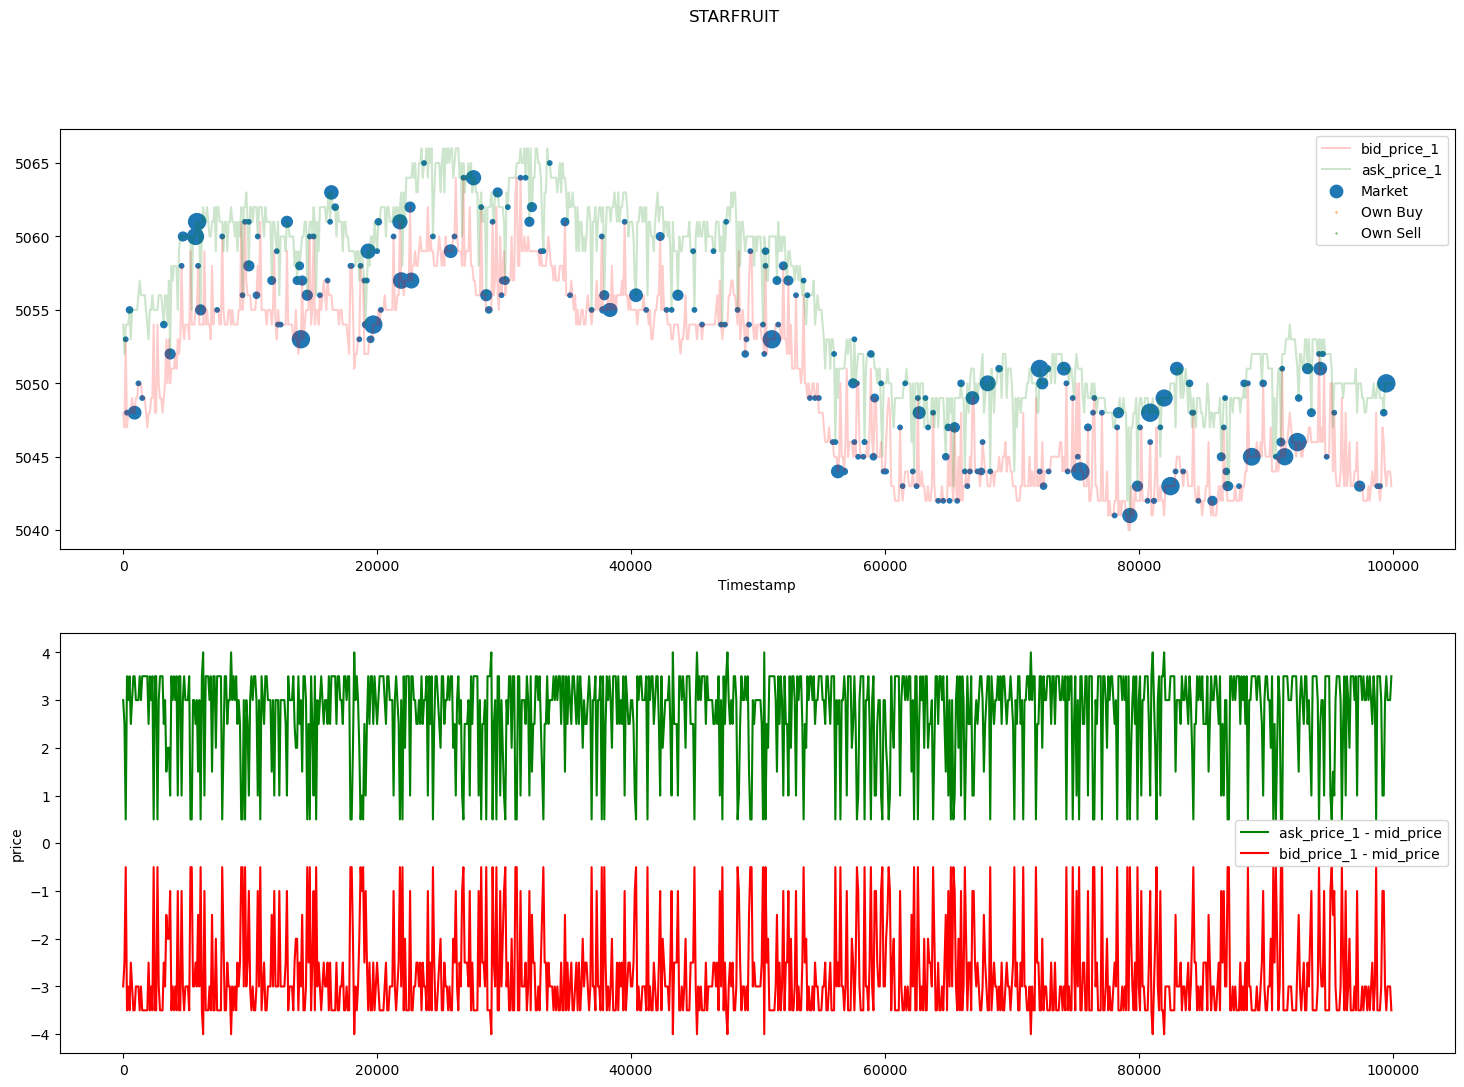

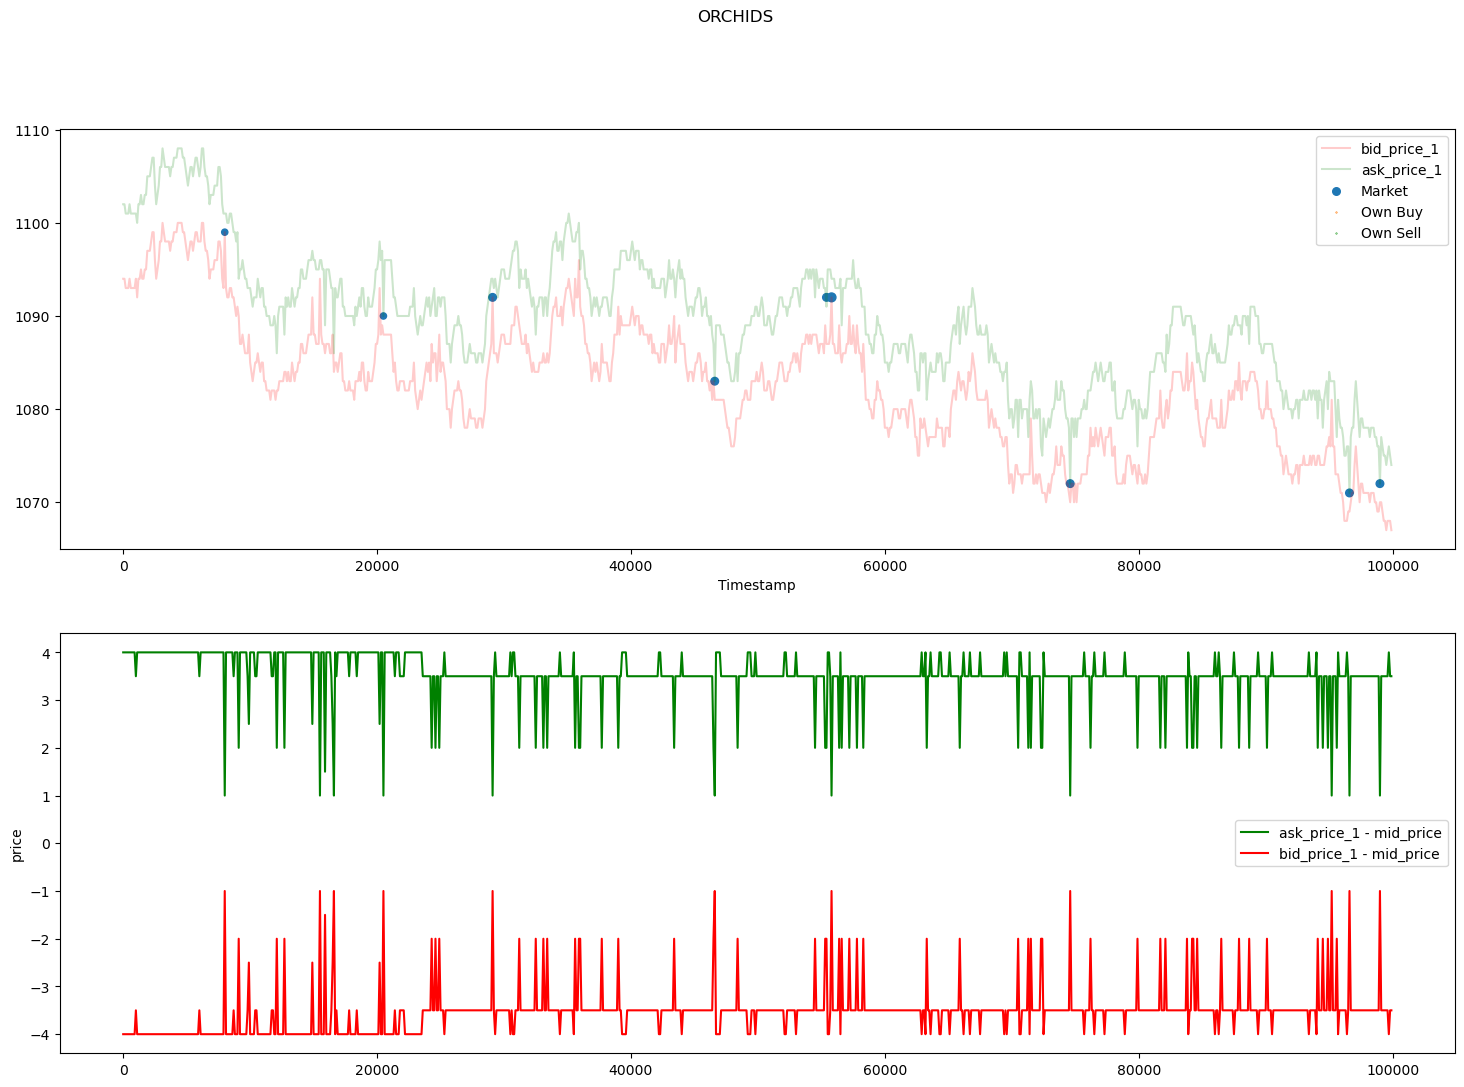

In [67]:
for symbol in products:
    activity = activity_log[activity_log['product'] == symbol].set_index('timestamp')
    market = market_trades[market_trades.symbol == symbol].set_index('timestamp')

    own_buy = own_trades[(own_trades.symbol == symbol) & (own_trades.buyer == 'SUBMISSION')].set_index('timestamp')
    own_sell = own_trades[(own_trades.symbol == symbol) & (own_trades.seller == 'SUBMISSION')].set_index('timestamp')
    
    fig, ax = plt.subplots(2, 1, figsize=(18, 12))
    fig.suptitle(symbol)

    plt.subplot(2, 1, 1)
    plt.plot(activity['bid_price_1'], label='bid_price_1', color='red', alpha=0.2,)
    plt.plot(activity['ask_price_1'], label='ask_price_1', color='green', alpha=0.2)
    # plt.plot(activity['mid_price'], label='mid_price_1', color='blue', alpha=0.2)
    plt.scatter(market.index, market.price, label='Market', s=10*market.quantity)
    plt.scatter(own_buy.index, own_buy.price, label='Own Buy', s=10*own_buy.quantity, marker='x', alpha=0.5)
    plt.scatter(own_sell.index, own_sell.price, label='Own Sell', s=10*own_sell.quantity, marker='x', alpha=0.5)
    plt.xlabel('Timestamp')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(activity['ask_price_1'] - activity['mid_price'], label='ask_price_1 - mid_price', color='green')
    plt.plot(activity['bid_price_1'] - activity['mid_price'], label='bid_price_1 - mid_price', color='red')
    plt.ylabel('price')
    plt.legend()
    
    plt.show()

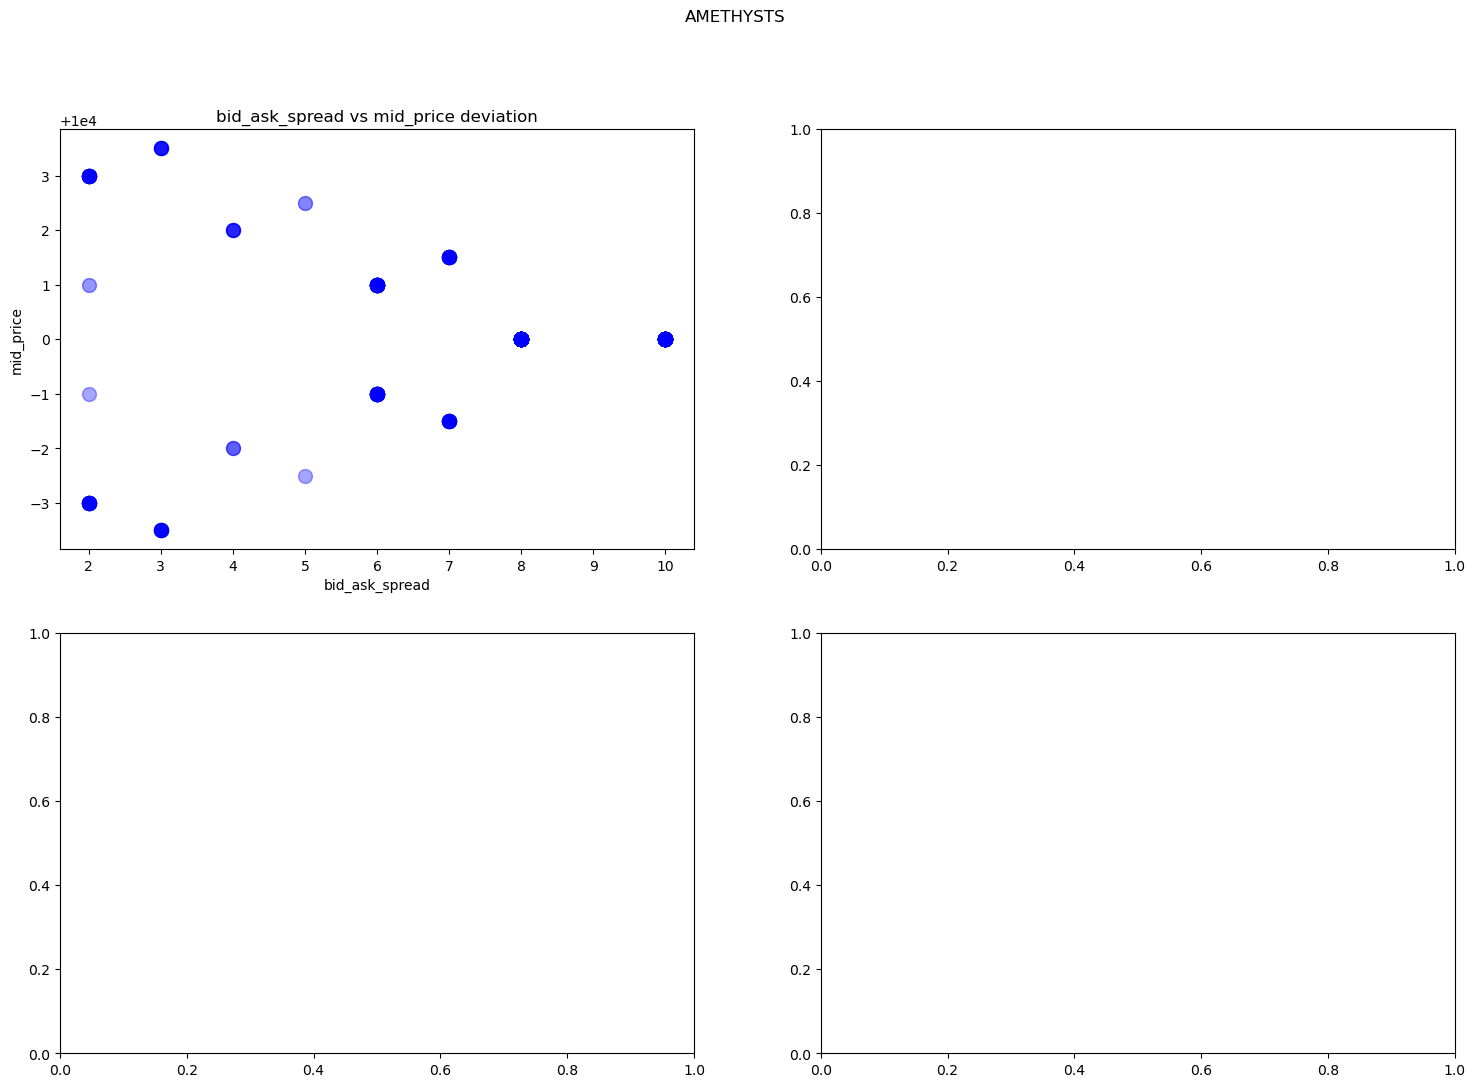

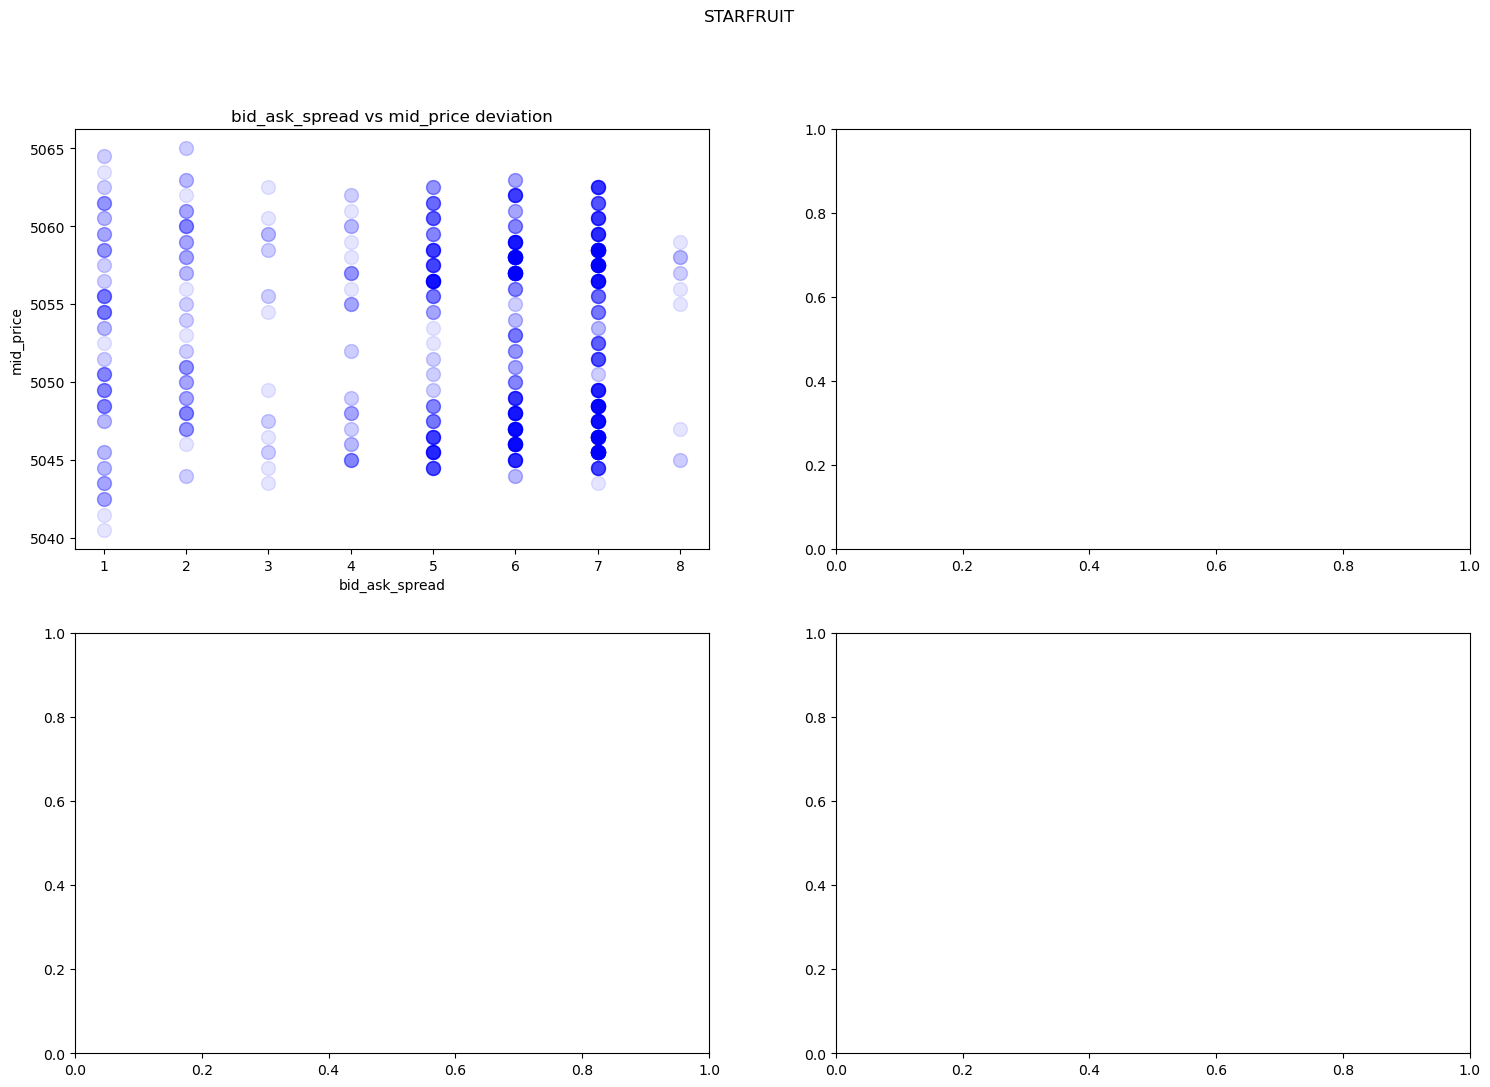

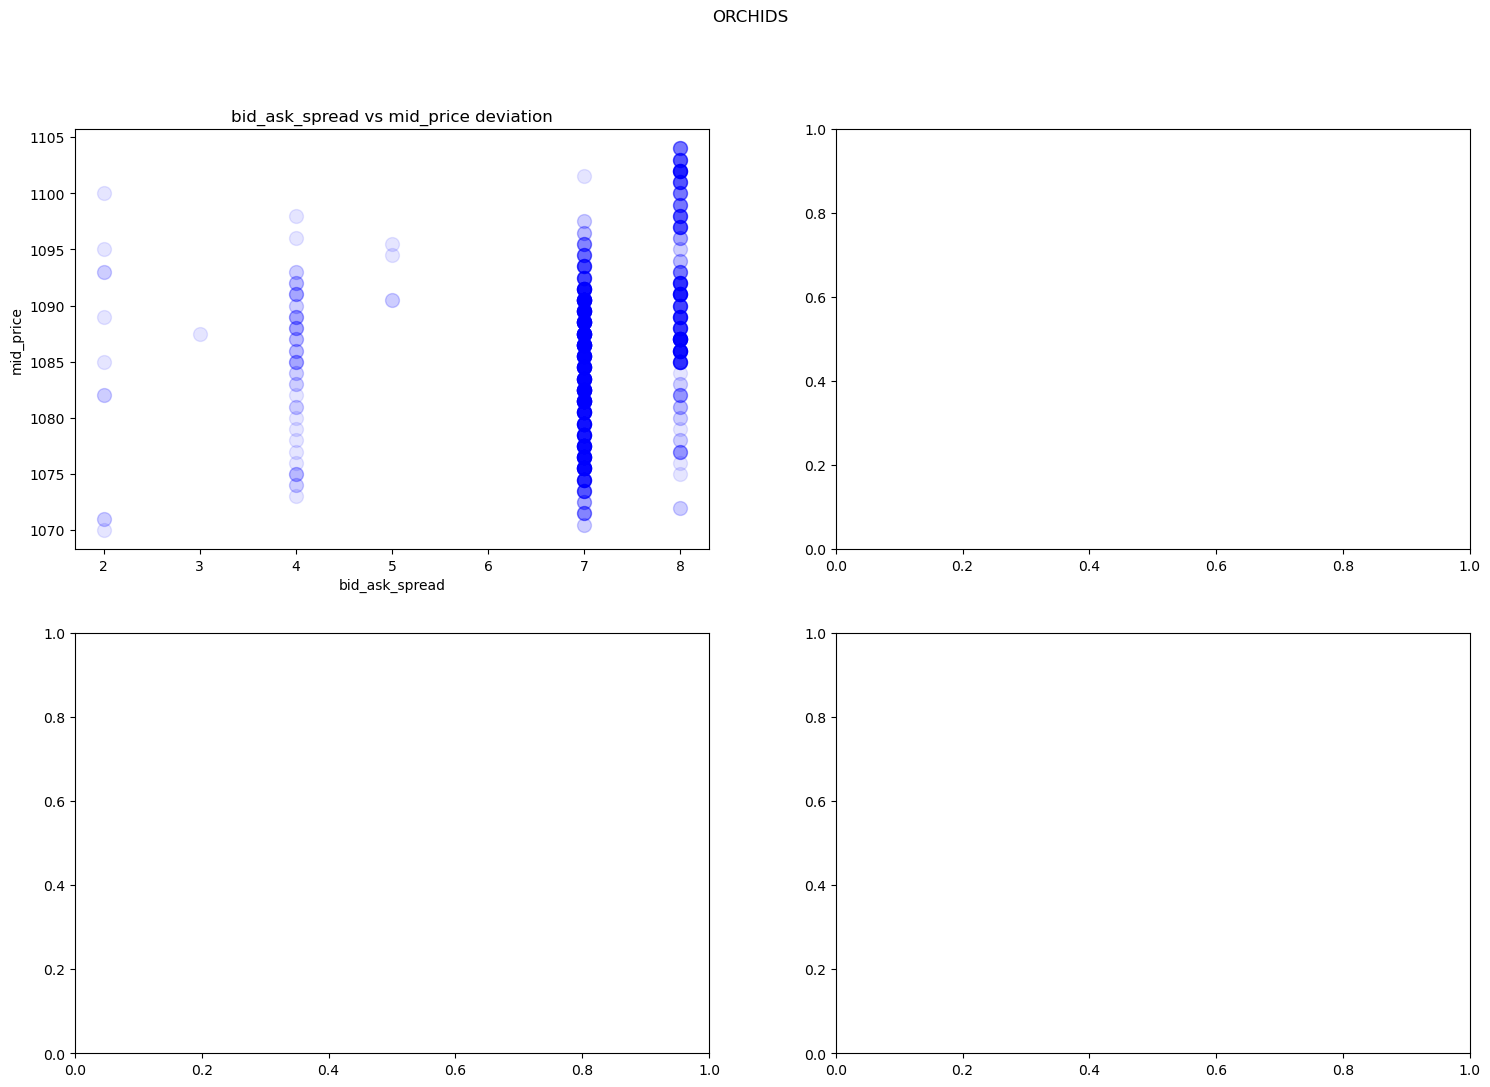

In [104]:
for symbol in products:
    activity = activity_log[activity_log['product'] == symbol].set_index('timestamp')
    market = market_trades[market_trades.symbol == symbol].set_index('timestamp')
    activity['bid_ask_spread'] = activity['ask_price_1'] - activity['bid_price_1']
    
    fig, ax = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle(symbol)

    plt.subplot(2, 2, 1)
    plt.scatter(activity['bid_ask_spread'], activity['mid_price'],color='blue', alpha=0.1, s=100)
    plt.xlabel('bid_ask_spread')
    plt.ylabel('mid_price')
    plt.title('bid_ask_spread vs mid_price deviation')

    plt.subplot(2, 2, 2)
    
    
    plt.show()

# Statistics of products (look at only market trades)

## AMETHYSTS

In [69]:
market = market_trades[market_trades.symbol == 'AMETHYSTS']
market.value_counts('price').sort_index()

price
9995     17
9996     19
9998     73
10002    64
10004    47
10005    13
Name: count, dtype: int64

In [70]:
market.price.describe()

count      233.000000
mean     10000.317597
std          3.169424
min       9995.000000
25%       9998.000000
50%      10002.000000
75%      10004.000000
max      10005.000000
Name: price, dtype: float64

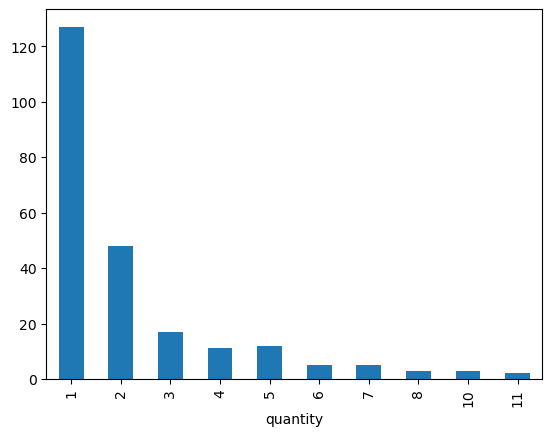

In [71]:
market.value_counts('quantity').sort_index().plot(kind='bar')
plt.show()

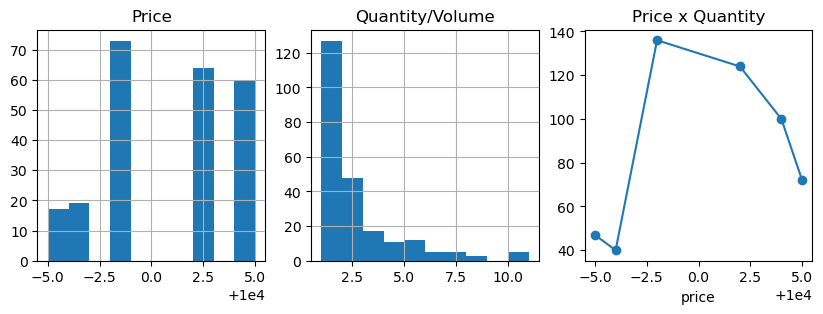

In [72]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
market.price.hist()
plt.title('Price')

plt.subplot(1, 3, 2)
market.quantity.hist()
plt.title('Quantity/Volume')

plt.subplot(1, 3, 3)
market.groupby('price').quantity.sum().plot(marker='o')
plt.title('Price x Quantity')

plt.show()

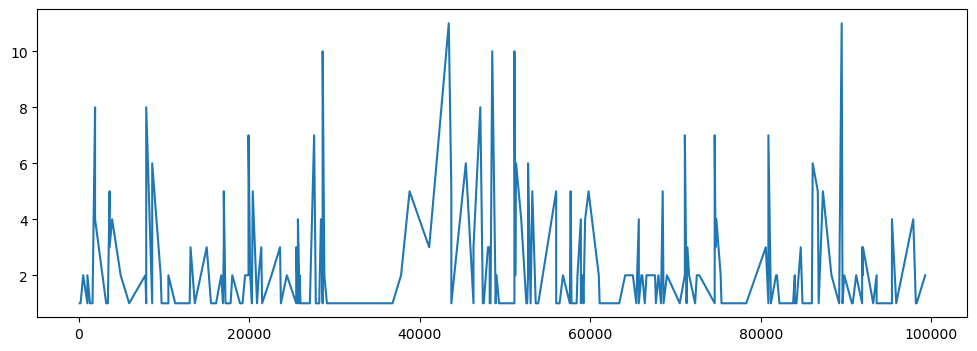

In [73]:
plt.figure(figsize=(12, 4))
plt.plot(market.timestamp, market.quantity)
plt.show()

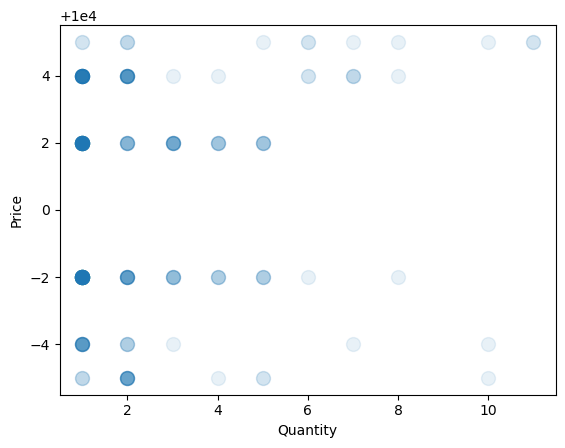

In [74]:
plt.scatter(market.quantity, market.price, alpha=0.1, s=100)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

## STARFRUIT


In [75]:
market = market_trades[market_trades.symbol == 'STARFRUTIT']

## ORCHIDS

In [76]:
market = market_trades[market_trades.symbol == 'ORCHIDS']
market.value_counts('price').sort_index()

price
1071    1
1072    2
1083    1
1090    1
1092    3
1099    1
Name: count, dtype: int64

# Price activity

## AMETHYSTS

## STARFRUIT

## ORCHIDS

In [82]:
activity_ORC = activity_log[activity_log['product'] == 'ORCHIDS'].set_index(['timestamp'])
activity_ORC

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,1,ORCHIDS,1094,10,1093.0,3.0,1086.0,41.0,1102,10,1104.0,3.0,1111.0,41.0,1098.0,0.0
100,1,ORCHIDS,1094,6,1093.0,2.0,1087.0,51.0,1102,6,1103.0,2.0,1110.0,51.0,1098.0,0.0
200,1,ORCHIDS,1093,6,1092.0,3.0,1085.0,49.0,1101,6,1102.0,3.0,1108.0,49.0,1097.0,0.0
300,1,ORCHIDS,1093,10,1092.0,4.0,1085.0,52.0,1101,10,1102.0,4.0,1109.0,52.0,1097.0,0.0
400,1,ORCHIDS,1093,10,1092.0,3.0,1086.0,51.0,1101,10,1102.0,3.0,1109.0,51.0,1097.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99500,1,ORCHIDS,1067,5,1066.0,4.0,1060.0,43.0,1074,5,1075.0,4.0,1082.0,43.0,1070.5,0.0
99600,1,ORCHIDS,1068,7,1067.0,2.0,1061.0,46.0,1075,7,1076.0,2.0,1083.0,46.0,1071.5,0.0
99700,1,ORCHIDS,1068,5,1067.0,3.0,1061.0,48.0,1076,5,1077.0,3.0,1083.0,48.0,1072.0,0.0


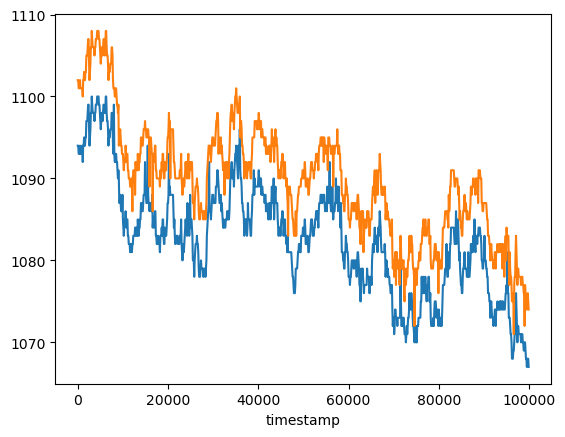

In [83]:
activity_ORC.bid_price_1.plot()
activity_ORC.ask_price_1.plot()
plt.show()

In [108]:
path = '../../shared_data/round2/prices_round_2_day_1.csv'

foreign_ORC = pd.read_csv(path, sep=';').set_index(['timestamp'])[:1000]
foreign_ORC

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
timestamp,,,,,,,
0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1
100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1
200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1
300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1
400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1
...,...,...,...,...,...,...,...
99500,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1
99600,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1
99700,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1


In [109]:
activity_ORC.mid_price

timestamp
0        1098.0
100      1098.0
200      1097.0
300      1097.0
400      1097.0
          ...  
99500    1070.5
99600    1071.5
99700    1072.0
99800    1071.5
99900    1070.5
Name: mid_price, Length: 1000, dtype: float64

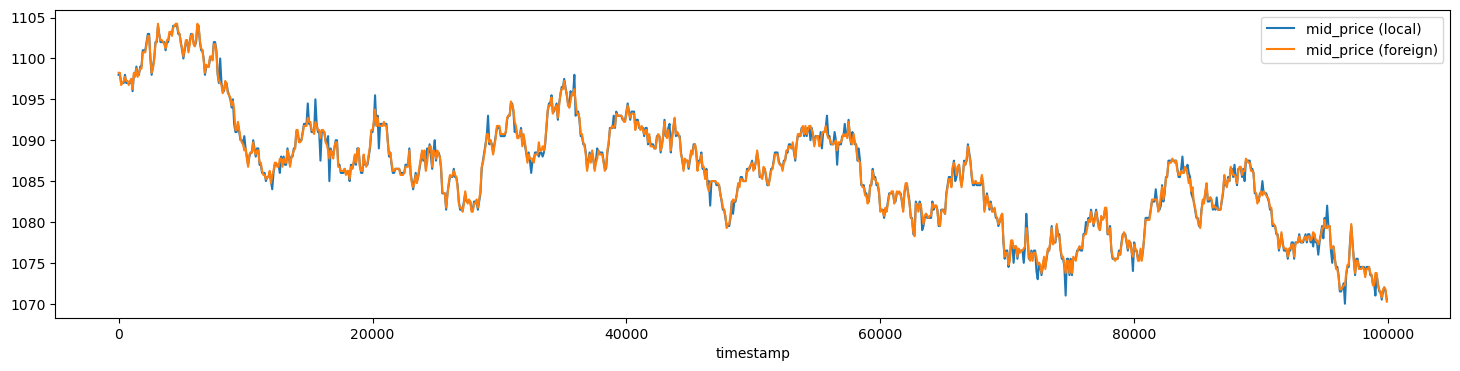

In [116]:
plt.figure(figsize=(18, 4))
activity_ORC.mid_price.plot()
foreign_ORC.ORCHIDS.plot()
plt.legend(['mid_price (local)', 'mid_price (foreign)'])
plt.show()

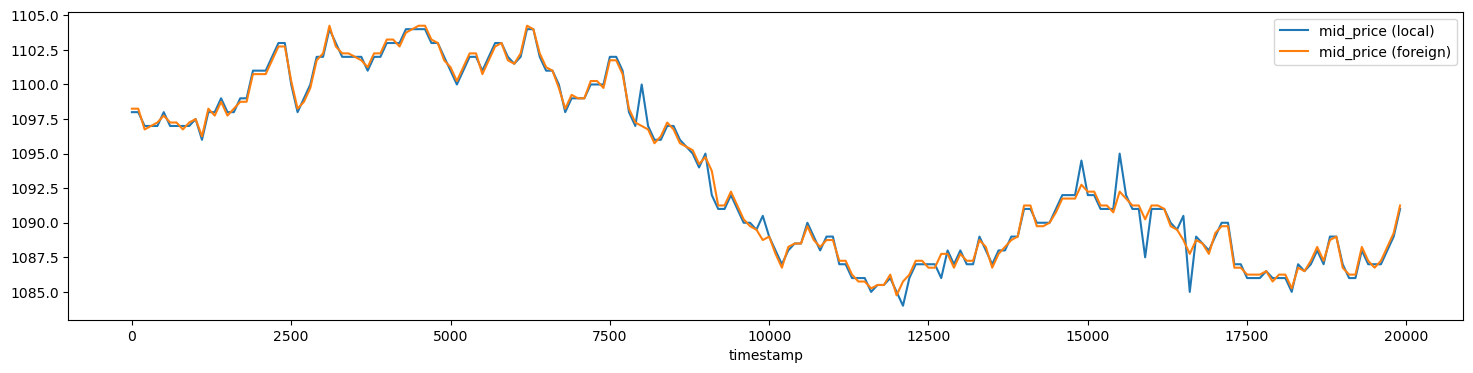

In [117]:
plt.figure(figsize=(18, 4))
activity_ORC.mid_price[:200].plot()
foreign_ORC.ORCHIDS[:200].plot()
plt.legend(['mid_price (local)', 'mid_price (foreign)'])
plt.show()

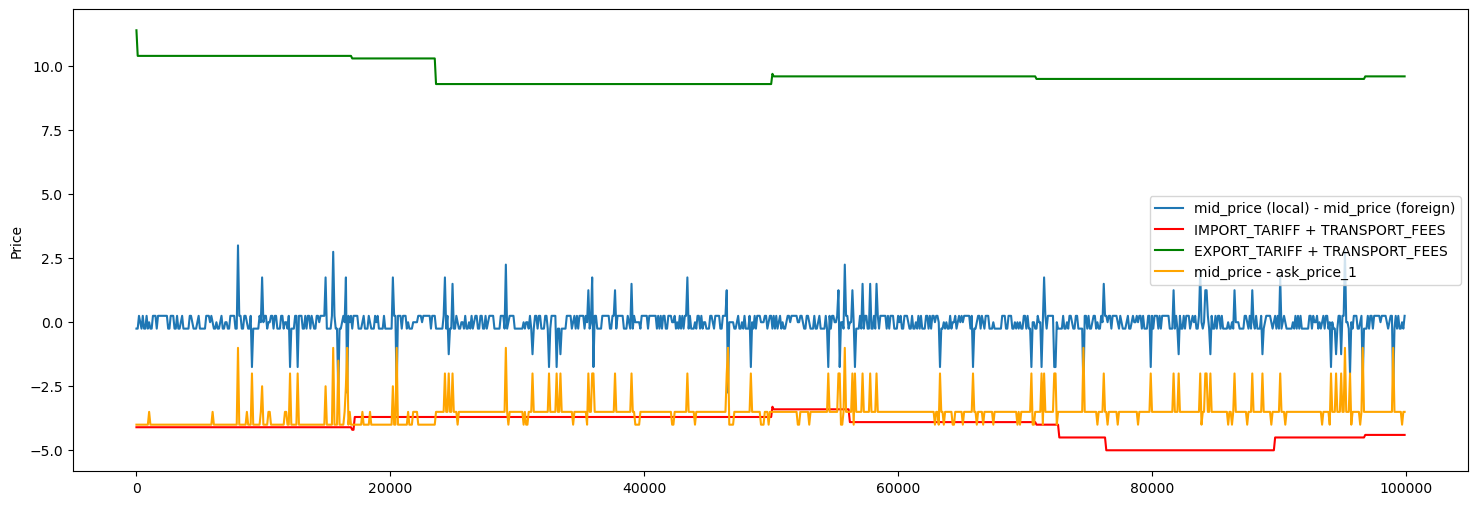

In [125]:
diff = activity_ORC.mid_price - foreign_ORC.ORCHIDS

fig, ax = plt.subplots(figsize=(18, 6))
assert isinstance(ax, plt.Axes)

ax.plot(diff, label='mid_price (local) - mid_price (foreign)')
ax.plot(foreign_ORC['IMPORT_TARIFF'] + foreign_ORC['TRANSPORT_FEES'], color='red', label='IMPORT_TARIFF + TRANSPORT_FEES')
ax.plot(foreign_ORC['EXPORT_TARIFF'] + foreign_ORC['TRANSPORT_FEES'], color='green', label='EXPORT_TARIFF + TRANSPORT_FEES')
ax.plot(activity_ORC['bid_price_1'] - activity_ORC['mid_price'], color='orange', label='mid_price - ask_price_1')
ax.legend()
ax.set_ylabel('Price')
plt.show()

In [24]:
local_spread = activity_ORC.ask_price_1 - activity_ORC.bid_price_1
local_spread.describe()

count    1000.000000
mean        7.051000
std         1.005689
min         2.000000
25%         7.000000
50%         7.000000
75%         8.000000
max         8.000000
dtype: float64

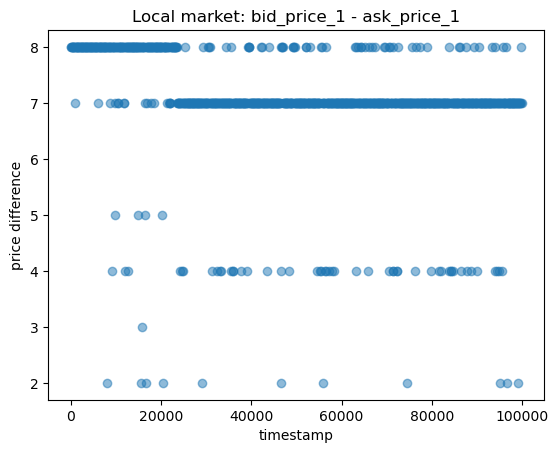

In [25]:
plt.plot((activity_ORC.ask_price_1 - activity_ORC.bid_price_1), marker='o', linestyle='', alpha=0.5)
plt.title('Local market: bid_price_1 - ask_price_1')
plt.xlabel('timestamp')
plt.ylabel('price difference')
plt.show()

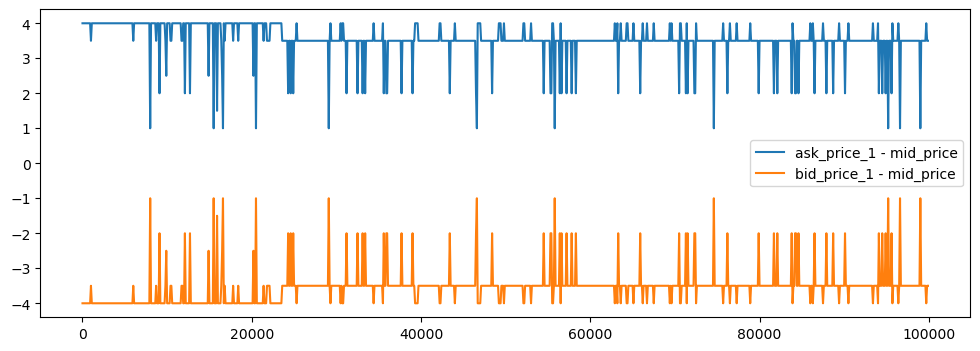

In [126]:
plt.figure(figsize=(12, 4))
plt.plot(activity_ORC.ask_price_1 - activity_ORC.mid_price, label='ask_price_1 - mid_price')
plt.plot(activity_ORC.bid_price_1 - activity_ORC.mid_price, label='bid_price_1 - mid_price')
plt.legend()
plt.show()

In [27]:
activity_ORC['ask_price_1'] - activity_ORC

,0,100,200,300,400,500,600,700,800,900,...,bid_price_1,bid_price_2,bid_price_3,bid_volume_1,bid_volume_2,bid_volume_3,day,mid_price,product,profit_and_loss
timestamp,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
